In [3]:
import os
env_vars = !cat .env
for var in env_vars:
    key, value = var.split('=')
    os.environ[key] = value

In [4]:
STABILITY_AI_KEY = os.environ["stability_ai_secret"]

In [5]:
import base64
import os
import requests

In [6]:
engine_id = "stable-diffusion-v1-5"
api_host = os.getenv('API_HOST', 'https://api.stability.ai')

if STABILITY_AI_KEY is None:
    raise Exception("Missing Stability API key.")

response = requests.post(
    f"{api_host}/v1/generation/{engine_id}/text-to-image",
    headers={
        "Content-Type": "application/json",
        "Accept": "application/json",
        "Authorization": f"Bearer {STABILITY_AI_KEY}"
    },
    json={
        "text_prompts": [
            {
                "text": "Doraemon with many cat with Japanese Anime Style"
            }
        ],
        "cfg_scale": 7,
        "clip_guidance_preset": "FAST_BLUE",
        "height": 512,
        "width": 512,
        "samples": 1,
        "steps": 30,
    },
)

if response.status_code != 200:
    raise Exception("Non-200 response: " + str(response.text))

data = response.json()

In [7]:
print(data)

{'artifacts': [{'base64': 'iVBORw0KGgoAAAANSUhEUgAAAgAAAAIACAIAAAB7GkOtAAACkGVYSWZNTQAqAAAACAAGAQAABAAAAAEAAAIAAQEABAAAAAEAAAIAAQ4AAgAAADEAAABWARAAAgAAABQAAACIATEAAgAAAA0AAACckhMAAQAAAeUAAACqAAAAAERvcmFlbW9uIHdpdGggbWFueSBjYXQgd2l0aCBKYXBhbmVzZSBBbmltZSBTdHlsZQAAc3RhYmlsaXR5LWRpZmZ1c2lvbgBzdGFiaWxpdHkuYWkAADNrRVM3dnBCNDplTzVOY3d7NWZlei9kZElmIUNsfWNvMD54dyZzNlRmRmM6Q2hBaW9Cd2gzMX1pYWxxTGVKYnB0aEEwREV3W3JVSWc9XnJjMHUjPCQwMio0KjFxN00tMCQyYnc9antWLzVpe045NUFYXU0zaUg8ITFwdGt4LnV7Ukw1d09bPTAkLSYuM2lIPE1jamY/Xi13ZD01NXZxXU8xcTdQOjAkKUtDQi1STlJCOD4renZxe2ZzeT9XdWlCOTcmMXk/bCU6eD55JDFCN11NZ2ZscWV6ZmtVU3JCLj5TZ2ZsemJGd08jamR3UHhvbzBzamhVNXA6KTQxKy1YVjp7NSU/YygkYkIyTkFGJjB0ay5HMDA0S2xlRHQhZWtROFAlMk0+WjcwdGtAMDRQV3B5ZUw0REZnK3lwKHovb2UwNSY3MjB4JkRWVGVJUDdsZVBrUHR6RUVrKDdDVi5heCZEVkplSS9kbGVPWzxmei9kc3R1VTdASTlOaC80alQ3angwMDAwLTYtWGs6a29abXUwMDAwLWRIY0heOU5oLzRqI2EoYWZIUCYxdnA6cF16eEtkcUJ6OCFsdnFadWt2eyVFNEN3aGVqYXdjNll2cVlUJHdHVG9SeChkQTdxLylxM3dEaFlnAJfnzewAAQAASURBVHictL13nCVHdSh8zqnqcMPkmd3Zr

In [33]:
from IPython.display import display, HTML
def display_image(data):
    for i, image in enumerate(data["artifacts"]):
       display(HTML(f'<img src="data:image/png;base64,{image["base64"]}" />'))


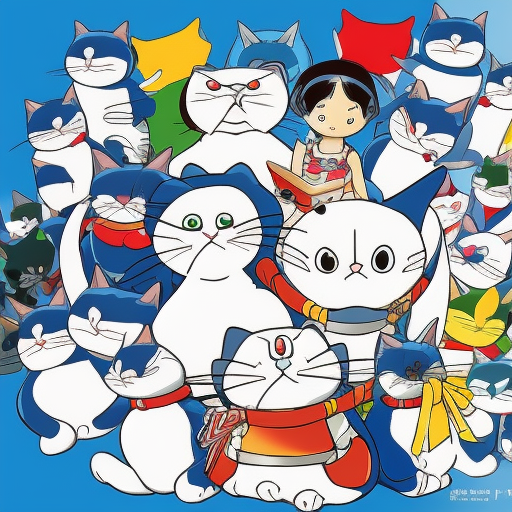

In [34]:
display_image(data)